In [ ]:
!pip install langchain_community
!pip install langchain_openai
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 2.9 MB/s eta 0:00:00


In [ ]:
# Conectamos con drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Abrimos el archivo
import pandas as pd

df = pd.read_csv('path')

# Creamos n filas vacías
desirable_rows = 1000

df = pd.concat([df, pd.DataFrame([{}] * desirable_rows)], ignore_index=True)

df.head()

,role,genre,age,comment,kind_of_comment,complaint
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Creamos los diccionarios para llenar la bd
role_list = ['alumno', 'padre', 'madre', 'maestro', 'trabajador', 'visita']
kind_of_comment = ['positivo', 'neutro', 'negativo']
complaints_list = ['precio', 'instalaciones', 'sabor', 'variedad']

,role,genre,age,comment,kind_of_comment,complaint
0,alumno,NaN,NaN,NaN,NaN,NaN
1,trabajador,NaN,NaN,NaN,NaN,NaN
2,madre,NaN,NaN,NaN,NaN,NaN
3,alumno,NaN,NaN,NaN,NaN,NaN
4,alumno,NaN,NaN,NaN,NaN,NaN


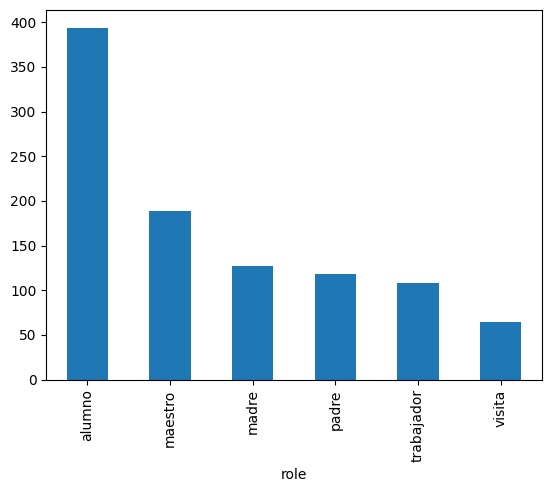

In [ ]:
# Llenamos la columna 'role'
import random

for i in range(desirable_rows):
  df.loc[i, 'role'] = random.randint(1, 17)

# Creamos un diccionario para controlar la cantidad de respuestas por cada rol
role_dict = {
    1: role_list[0],
    2: role_list[0],
    3: role_list[0],
    4: role_list[0],
    5: role_list[0],
    6: role_list[0],
    7: role_list[0],
    8: role_list[1],
    9: role_list[1],
    10: role_list[2],
    11: role_list[2],
    12: role_list[3],
    13: role_list[3],
    14: role_list[3],
    15: role_list[4],
    16: role_list[4],
    17: role_list[5]
}

# Traducimos los números a su rol correspondiente
for i in range(desirable_rows):
  df.loc[i, 'role'] = role_dict[df.loc[i, 'role']]

# Creamos un gráfico de barras para ver la proporción de cada rol
df['role'].value_counts().plot(kind='bar')

df.head()

,role,genre,age,comment,kind_of_comment,complaint
0,alumno,hombre,NaN,NaN,NaN,NaN
1,trabajador,hombre,NaN,NaN,NaN,NaN
2,madre,mujer,NaN,NaN,NaN,NaN
3,alumno,mujer,NaN,NaN,NaN,NaN
4,alumno,hombre,NaN,NaN,NaN,NaN


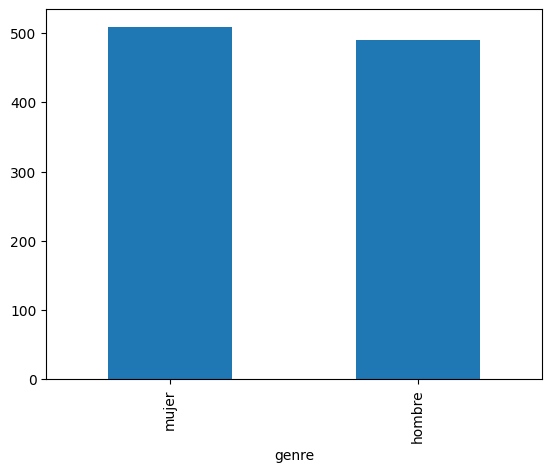

In [ ]:
# Llenamos la columna 'genre'
for i in range(desirable_rows):
  if df.loc[i, 'role'] == role_list[1]:
    df.loc[i, 'genre'] = 1
  elif df.loc[i, 'role'] == role_list[2]:
    df.loc[i, 'genre'] = 2
  else:
    df.loc[i, 'genre'] = random.randint(1, 2)

genre_dict = {
    1: 'hombre',
    2: 'mujer'
}

for i in range(desirable_rows):
  df.loc[i, 'genre'] = genre_dict[df.loc[i, 'genre']]

df['genre'].value_counts().plot(kind='bar')

df.head()

,role,genre,age,comment,kind_of_comment,complaint
0,alumno,hombre,29,NaN,NaN,NaN
1,trabajador,hombre,48,NaN,NaN,NaN
2,madre,mujer,69,NaN,NaN,NaN
3,alumno,mujer,20,NaN,NaN,NaN
4,alumno,hombre,25,NaN,NaN,NaN


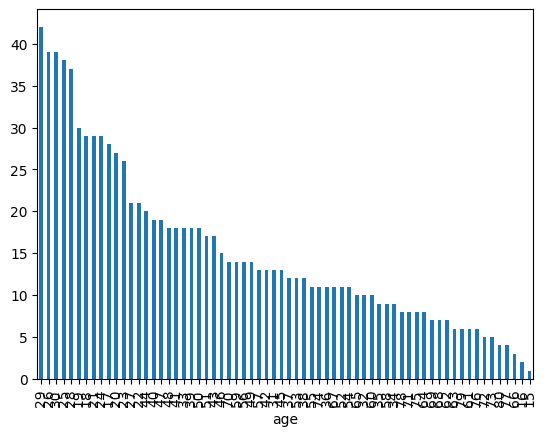

In [ ]:
# Llenamos la columna 'age'
for i in range(desirable_rows):
  if df.loc[i, 'role'] == role_list[0]:
    df.loc[i, 'age'] = random.randint(17, 30)
  elif df.loc[i, 'role'] == role_list[1] or df.loc[i, 'role'] == role_list[2]:
    df.loc[i, 'age'] = random.randint(40,80)
  elif df.loc[i, 'role'] == role_list[3]:
    df.loc[i, 'age'] = random.randint(30,60)
  elif df.loc[i, 'role'] == role_list[4]:
    df.loc[i, 'age'] = random.randint(25,50)
  else :
    df.loc[i, 'age'] = random.randint(15,80)

df['age'].value_counts().plot(kind='bar')

df.head()

,role,genre,age,comment,kind_of_comment,complaint
0,alumno,hombre,29,NaN,negativo,NaN
1,trabajador,hombre,48,NaN,neutro,NaN
2,madre,mujer,69,NaN,negativo,NaN
3,alumno,mujer,20,NaN,positivo,NaN
4,alumno,hombre,25,NaN,negativo,NaN


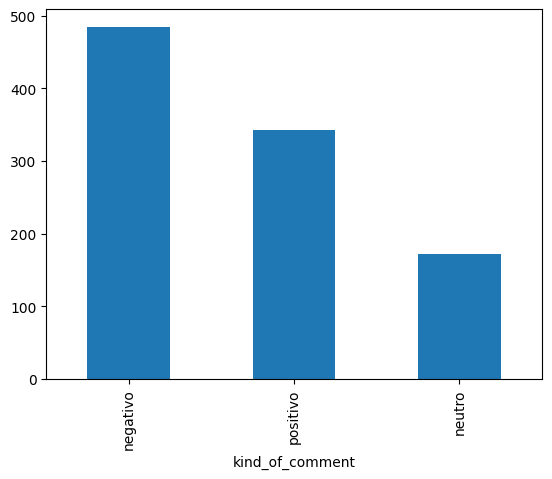

In [ ]:
# Llenamos la columna 'kind_of_comment'
for i in range(desirable_rows):
  df.loc[i, 'kind_of_comment'] = random.randint(1, 6)

kind_dict = {
    1: kind_of_comment[0],
    2: kind_of_comment[0],
    3: kind_of_comment[1],
    4: kind_of_comment[2],
    5: kind_of_comment[2],
    6: kind_of_comment[2]
}

for i in range(desirable_rows):
  df.loc[i, 'kind_of_comment'] = kind_dict[df.loc[i, 'kind_of_comment']]

df['kind_of_comment'].value_counts().plot(kind='bar')

df.head()

,role,genre,age,comment,kind_of_comment,complaint
0,alumno,hombre,29,NaN,negativo,precio
1,trabajador,hombre,48,NaN,neutro,NaN
2,madre,mujer,69,NaN,negativo,sabor
3,alumno,mujer,20,NaN,positivo,NaN
4,alumno,hombre,25,NaN,negativo,precio


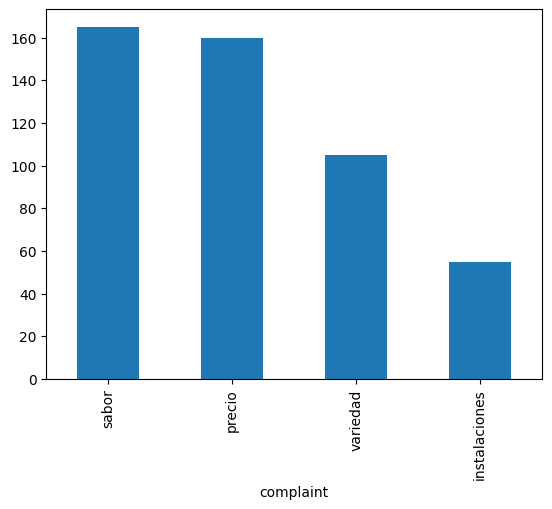

In [ ]:
# Llenamos la columna 'complaint'
import numpy as np

for i in range(desirable_rows):
  if df.loc[i, 'kind_of_comment'] == kind_of_comment[2]:
    df.loc[i, 'complaint'] = random.randint(1, 9)

complaint_dict = {
    1: complaints_list[0],
    2: complaints_list[0],
    3: complaints_list[0],
    4: complaints_list[1],
    5: complaints_list[2],
    6: complaints_list[2],
    7: complaints_list[2],
    8: complaints_list[3],
    9: complaints_list[3]
}

for i in range(desirable_rows):
  if pd.notna(df.loc[i, 'complaint']):
   df.loc[i, 'complaint'] = complaint_dict[df.loc[i, 'complaint']]

df['complaint'].value_counts().plot(kind='bar')

df.head()

In [ ]:
# Escribimos el prompt
prompt = """
Eres una IA que genera comentarios sintéticos para una encuesta de satisfacción sobre la cafetería de la Universidad Panamericana.

Recibirás en el query el perfil del encuestado, incluyendo:
- rol (alumno, padre, madre, profesor, trabajador o visita)
- género
- edad
- tipo de respuesta (positiva, neutra o negativa)
- queja principal (precio, mobiliario, sabor, calidad, variedad, atención, limpieza o ambiente)

Tu tarea:
- Generar únicamente el comentario, sin explicaciones.
- Ajustar el tono y vocabulario al perfil recibido.
- Hacer que suene natural, humano y con personalidad coherente al contexto universitario.
- El comentario debe ser una sola oración.
- No debes repetir, mencionar ni describir directamente el rol, la edad, el género o cualquier otro dato del perfil. Solo úsalo para influir en el tono.

Restricciones por tipo:
- Positivo: 2–20 palabras. No mencionar queja.
- Neutro: 0–10 palabras. No mencionar queja.
- Negativo: 2–30 palabras. Puede incluir varias quejas, pero la principal debe ser la primera mencionada.

Instrucciones adicionales:
- Evita repeticiones entre respuestas.
- Puedes mencionar o no las quejas secundarias.
- Usa expresiones naturales de español mexicano contemporáneo.
"""

# Definimos la función para crear el query
def createQuery(row):
  q_role = row['role']
  q_genre = row['genre']
  q_age = row['age']
  q_kind = row['kind_of_comment']
  q_complaint = row['complaint']

  if q_kind != 'negativo':
    query = f"""
    Eres un/a {q_role} de género {q_genre} y {q_age} años.
    Tu comentario es de carácter {q_kind}.
    """
  else:
    query = f"""
    Eres un/a {q_role} de género {q_genre} y {q_age} años.
    Tu comentario es de carácter {q_kind}.
    Tu queja principal es sobre {q_complaint}.
    """

  return query

In [ ]:
import os
os.environ['OPENAI_API_KEY'] = "openai_key"

from langchain_core.messages import HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI

chat = ChatOpenAI(model='gpt-5-nano')

In [ ]:
# Generamos los comentarios de las filas 1 a 100
for i in range(1, 100):
  query = createQuery(df.loc[i])

  result = chat.invoke([
    SystemMessage(content=prompt),
    HumanMessage(content=query)
  ])

  df.loc[i, 'comment'] = result.content.strip()

df.head()

,role,genre,age,comment,kind_of_comment,complaint
0,alumno,hombre,29,El precio de la comida está carísimo para lo q...,negativo,precio
1,trabajador,hombre,48,"Todo bien, gracias por mantener la cafetería o...",neutro,NaN
2,madre,mujer,69,"Como madre de familia, el sabor de la comida d...",negativo,sabor
3,alumno,mujer,20,Me encanta la vibra de la cafetería; siempre h...,positivo,NaN
4,alumno,hombre,25,El precio está caro para lo que ofrecen y la a...,negativo,precio


In [ ]:
# Generamos los comentarios de las filas 101 a 200
for i in range(101, 200):
  query = createQuery(df.loc[i])

  result = chat.invoke([
    SystemMessage(content=prompt),
    HumanMessage(content=query)
  ])

  df.loc[i, 'comment'] = result.content.strip()

In [ ]:
# Generamos los comentarios de las filas 201 a 300
for i in range(201, 300):
  query = createQuery(df.loc[i])

  result = chat.invoke([
    SystemMessage(content=prompt),
    HumanMessage(content=query)
  ])

  df.loc[i, 'comment'] = result.content.strip()

In [ ]:
# Generamos los comentarios de las filas 301 a 400
for i in range(301, 400):
  query = createQuery(df.loc[i])

  result = chat.invoke([
    SystemMessage(content=prompt),
    HumanMessage(content=query)
  ])

  df.loc[i, 'comment'] = result.content.strip()

In [ ]:
# Generamos los comentarios de las filas 401 a 500
for i in range(401, 500):
  query = createQuery(df.loc[i])

  result = chat.invoke([
    SystemMessage(content=prompt),
    HumanMessage(content=query)
  ])

  df.loc[i, 'comment'] = result.content.strip()

In [ ]:
# Generamos los comentarios de las filas 501 a 600
for i in range(501, 600):
  query = createQuery(df.loc[i])

  result = chat.invoke([
    SystemMessage(content=prompt),
    HumanMessage(content=query)
  ])

  df.loc[i, 'comment'] = result.content.strip()

In [ ]:
# Generamos los comentarios de las filas 601 a 700
for i in range(601, 700):
  query = createQuery(df.loc[i])

  result = chat.invoke([
    SystemMessage(content=prompt),
    HumanMessage(content=query)
  ])

  df.loc[i, 'comment'] = result.content.strip()

In [ ]:
# Generamos los comentarios de las filas 701 a 800
for i in range(701, 800):
  query = createQuery(df.loc[i])

  result = chat.invoke([
    SystemMessage(content=prompt),
    HumanMessage(content=query)
  ])

  df.loc[i, 'comment'] = result.content.strip()

In [ ]:
# Generamos los comentarios de las filas 801 a 900
for i in range(801, 900):
  query = createQuery(df.loc[i])

  result = chat.invoke([
    SystemMessage(content=prompt),
    HumanMessage(content=query)
  ])

  df.loc[i, 'comment'] = result.content.strip()

In [ ]:
# Generamos los comentarios de las filas 901 a 1000
for i in range(901, 1000):
  query = createQuery(df.loc[i])

  result = chat.invoke([
    SystemMessage(content=prompt),
    HumanMessage(content=query)
  ])

  df.loc[i, 'comment'] = result.content.strip()

In [ ]:
#Descargamos el archivo
from google.colab import files
df.to_csv("updated_file.csv", index=False, encoding="utf-8")
files.download("updated_file.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>